In [ ]:
# Import data
import yfinance as yf
stock_df = yf.download("MSFT", start="2020-01-01", end="2025-06-30")
stock_df.tail()

/tmp/ipython-input-1-2090666911.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_df = yf.download("MSFT", start="2020-01-01", end="2025-06-30")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000
2025-06-24,490.109985,491.850006,486.799988,488.950012,22305600
2025-06-25,492.269989,494.559998,489.390015,492.040009,17495100
2025-06-26,497.450012,498.040009,492.809998,492.980011,21578900
2025-06-27,495.940002,499.299988,493.029999,497.549988,34539200


In [ ]:
# Check for any null data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1379 entries, 2020-01-02 to 2025-06-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, MSFT)   1379 non-null   float64
 1   (High, MSFT)    1379 non-null   float64
 2   (Low, MSFT)     1379 non-null   float64
 3   (Open, MSFT)    1379 non-null   float64
 4   (Volume, MSFT)  1379 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 64.6 KB


In [ ]:
# Check statistics in the data
stock_df.describe()

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
count,1379.000000,1379.000000,1379.000000,1379.000000,1.379000e+03
mean,299.570201,302.422271,296.401778,299.431774,2.815506e+07
std,87.145068,87.437530,86.690248,87.103215,1.252261e+07
min,129.383621,134.304098,126.612924,130.902772,7.164500e+06
25%,233.646812,235.815841,229.951445,232.894411,2.014045e+07
50%,284.984955,286.765926,281.333742,283.910267,2.491120e+07
75%,384.566528,387.199169,378.225654,382.353067,3.253125e+07
max,497.450012,499.299988,493.029999,497.549988,9.701270e+07


In [ ]:
#Create the target column, as the price of close on the next day
stock_df["Target_Close"] = stock_df["Close"].shift(-1)
stock_df = stock_df.dropna()
stock_df

Price,Close,High,Low,Open,Volume,Target_Close
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,
Date,,,,,,
2020-01-02,153.042297,153.147108,150.860341,151.289108,22622100,151.136658
2020-01-03,151.136658,152.403913,150.603080,150.850823,21116200,151.527344
2020-01-06,151.527344,151.594048,149.126227,149.669343,20813700,150.145721
2020-01-07,150.145721,152.137116,149.897993,151.803637,21634100,152.537247
2020-01-08,152.537247,153.213757,150.498209,151.431970,27746500,154.442947
...,...,...,...,...,...,...
2025-06-20,477.399994,483.459991,476.869995,482.230011,37576200,486.000000
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000,490.109985


In [ ]:
# Remove the Ticker level from the headers (To make it clearer)
stock_df.columns = stock_df.columns.get_level_values(0)
stock_df

Price,Close,High,Low,Open,Volume,Target_Close
Date,,,,,,
2020-01-02,153.042297,153.147108,150.860341,151.289108,22622100,151.136658
2020-01-03,151.136658,152.403913,150.603080,150.850823,21116200,151.527344
2020-01-06,151.527344,151.594048,149.126227,149.669343,20813700,150.145721
2020-01-07,150.145721,152.137116,149.897993,151.803637,21634100,152.537247
2020-01-08,152.537247,153.213757,150.498209,151.431970,27746500,154.442947
...,...,...,...,...,...,...
2025-06-20,477.399994,483.459991,476.869995,482.230011,37576200,486.000000
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000,490.109985
2025-06-24,490.109985,491.850006,486.799988,488.950012,22305600,492.269989


In [ ]:
# Add statistical indicators for the data
stock_df['vol_20d'] = stock_df['Close'].rolling(20).std()
stock_df['momo_5d']  = stock_df['Close'].diff(5)
stock_df['bb_hi']    = stock_df['Close'].rolling(20).mean() + 2*stock_df['vol_20d']
stock_df['bb_lo']    = stock_df['Close'].rolling(20).mean() - 2*stock_df['vol_20d']

stock_df = stock_df.dropna()
stock_df

Price,Close,High,Low,Open,Volume,Target_Close,vol_20d,momo_5d,bb_hi,bb_lo
Date,,,,,,,,,,
2020-01-30,164.628632,165.838720,162.732510,165.838720,51597500,162.198914,3.561595,5.774094,163.088269,148.841890
2020-01-31,162.198914,164.266536,161.579585,164.085512,36142700,166.153183,3.749667,4.945145,163.922245,148.923576
2020-02-03,166.153183,166.267517,162.360939,162.389523,30107000,171.622360,4.120545,11.529205,165.414828,148.932646
2020-02-04,171.622360,172.117832,167.992109,168.782954,36433300,171.412689,5.022526,13.968384,168.223539,148.133436
2020-02-05,171.412689,175.509827,169.992994,175.347849,39186300,174.966766,5.464209,11.300446,170.170254,148.313417
...,...,...,...,...,...,...,...,...,...,...
2025-06-20,477.399994,483.459991,476.869995,482.230011,37576200,486.000000,9.081070,-1.470001,485.859137,449.534857
2025-06-23,486.000000,487.750000,472.510010,478.209991,24864000,490.109985,9.427219,11.040009,488.108437,450.399559
2025-06-24,490.109985,491.850006,486.799988,488.950012,22305600,492.269989,9.403278,10.969971,490.057054,452.443941


In [ ]:
# Remove NaN values (The last row of Target_Close)
stock_df = stock_df.dropna(subset=["Target_Close"])

In [ ]:
# Check for correlation of features with target
import pandas as pd
corr_matrix = stock_df.corr()
print(corr_matrix["Target_Close"].sort_values(ascending=False))

# All columns except Volume seem to be highly correleated to target.

Price
Target_Close    1.000000
Close           0.998219
High            0.997888
Low             0.997860
Open            0.997302
bb_hi           0.988279
bb_lo           0.983990
vol_20d         0.353780
momo_5d         0.089207
Volume         -0.467700
Name: Target_Close, dtype: float64


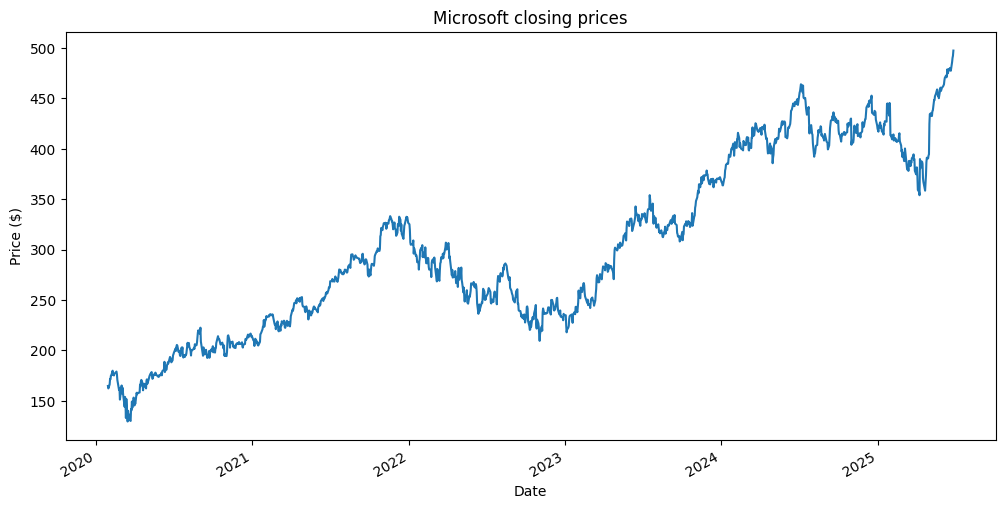

In [ ]:
# Plot the true values of the closing times (for comparison later)
import matplotlib.pyplot as plt
stock_df["Close"].plot(figsize=(12,6), title="Microsoft closing prices")
plt.ylabel("Price ($)")
plt.xlabel("Date")
plt.show()

In [ ]:
# Divide independent (target) and dependent variables
X = stock_df.drop("Target_Close", axis=1)
y = stock_df["Target_Close"]


In [ ]:
# Split data then scale --> Eliminates data leakage.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False                       #Since this is chronological data, shuffling is bad
)

# Define the scalers for features and target feature.
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = X_scaler.fit_transform(X_train)    # Computes min/max/mean... from training set
X_test_scaled = X_scaler.transform(X_test)    # Applies training set's scaling parameters to the test data.

y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1,1))

X_train = X_train_scaled
X_test = X_test_scaled
y_train = y_train_scaled
y_test = y_test_scaled

In [ ]:
# Convert the NumPy arrays into torch tensors so that PyTorch can perform operations on them

import torch

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
X_train_tensor

tensor([[0.1183, 0.1065, 0.1215,  ..., 0.5857, 0.0176, 0.0899],
        [0.1102, 0.1012, 0.1176,  ..., 0.5717, 0.0207, 0.0902],
        [0.1234, 0.1080, 0.1203,  ..., 0.6829, 0.0261, 0.0902],
        ...,
        [0.9951, 0.9979, 0.9924,  ..., 0.7100, 0.9837, 0.9097],
        [1.0000, 0.9960, 1.0000,  ..., 0.6129, 0.9942, 0.9072],
        [0.9883, 1.0000, 0.9943,  ..., 0.5890, 1.0000, 0.9116]])

In [ ]:
X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([1087, 9]),
 torch.Size([1087, 1]),
 torch.Size([272, 9]),
 torch.Size([272, 1]))

In [ ]:
# Build the Linear Regression model
import torch.nn as nn

class LinearRegressionModel(nn.Module):     # Almost everything in PyTorch inherits from nn.Module.
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(in_features=9, out_features=1)    # Implements the linear regression equation to the data, and creates the parameters for us. Useful when we don't know the ideal parameters.

    def forward(self, x):   # Must be overwritten if a class inherits from nn.Module. Defines the computaton of the model.
        return self.linear(x)

In [ ]:
# Create a random seed so that my testing values are the same each time (random initially but not different each run)
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model = LinearRegressionModel()
list(model.parameters())  #These are the random values we start with, which the model will perform gradient descent to improve them for us.

[Parameter containing:
 tensor([[ 0.2548,  0.2767, -0.0781,  0.3062, -0.0730,  0.0673, -0.1623,  0.1958,
           0.2938]], requires_grad=True),
 Parameter containing:
 tensor([-0.2445], requires_grad=True)]

In [ ]:
# The 5 values in the weight tensor are the coefficients for each column in X. They are initially random, and during each epoch of the training loop they will be improved.
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.2548,  0.2767, -0.0781,  0.3062, -0.0730,  0.0673, -0.1623,  0.1958,
                        0.2938]])),
             ('linear.bias', tensor([-0.2445]))])

In [ ]:
!pip install optuna # A library used for hyperparameter tuning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 18.3 MB/s eta 0:00:00


In [ ]:
import optuna
torch.manual_seed(42)

def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64, 128, len(X_train_tensor)])
    epochs = trial.suggest_int("epochs", 50, 300)
    loss_name = trial.suggest_categorical("loss_fn", ["L1", "MSE"])

    # Loss function
    if loss_name == "L1":
        loss_fn = nn.L1Loss()
    else:
        loss_fn = nn.MSELoss()

    # Create the model to test hyperparameters on
    model = LinearRegressionModel()

    # Create the optimizer (What reduces the modes inaccuracy epoch by epoch)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # DataLoader
    dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Training loop
    for epoch in range(epochs):
        model.train()
        for xb, yb in loader:
            optimizer.zero_grad()
            y_pred = model(xb)
            loss = loss_fn(y_pred, yb)
            loss.backward()
            optimizer.step()

    # Testing part of loop
    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test_tensor)
        test_loss = loss_fn(test_pred, y_test_tensor)
    return test_loss.item()

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)  # Runs n trials with different hyperparameters to find the best combination.

best_params = study.best_params

print("Best hyperparameters:", study.best_params)
print("Best test loss:", study.best_value)

[I 2025-07-13 09:33:10,796] A new study created in memory with name: no-name-9d49ed16-5f48-4492-8ce8-e19499852f07
[I 2025-07-13 09:33:26,937] Trial 0 finished with value: 0.0011530271731317043 and parameters: {'lr': 0.08695508332316587, 'batch_size': 16, 'epochs': 56, 'loss_fn': 'MSE'}. Best is trial 0 with value: 0.0011530271731317043.
[I 2025-07-13 09:33:28,975] Trial 1 finished with value: 1.2711535692214966 and parameters: {'lr': 8.107858725456877e-05, 'batch_size': 1087, 'epochs': 156, 'loss_fn': 'L1'}. Best is trial 0 with value: 0.0011530271731317043.
[I 2025-07-13 09:33:30,702] Trial 2 finished with value: 0.19201573729515076 and parameters: {'lr': 0.00028069284361806595, 'batch_size': 128, 'epochs': 106, 'loss_fn': 'MSE'}. Best is trial 0 with value: 0.0011530271731317043.
[I 2025-07-13 09:33:43,460] Trial 3 finished with value: 0.000573871424421668 and parameters: {'lr': 0.0003122439480154772, 'batch_size': 16, 'epochs': 226, 'loss_fn': 'MSE'}. Best is trial 3 with value: 0.0

Best hyperparameters: {'lr': 0.005232552773671297, 'batch_size': 16, 'epochs': 276, 'loss_fn': 'MSE'}
Best test loss: 0.0004930016002617776


In [ ]:
# Train the actual model with the ideal hyperparameters output by optuna.

from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(42)

# Hyperparameters
lr = best_params["lr"]
loss_fn = best_params["loss_fn"]
epochs = best_params["epochs"]
batch_size = best_params["batch_size"]

if loss_fn == "L1":
    loss_fn = nn.L1Loss()
else:
    loss_fn = nn.MSELoss()

dataset = TensorDataset(X_train_tensor, y_train_tensor)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

#Training loop:
epochs = epochs
for epoch in range(epochs):
  model.train() # Set the model to training mode (Data it sees will train it)
  for xb, yb in loader:
      optimizer.zero_grad()
      y_pred = model(xb)
      loss = loss_fn(y_pred, yb)
      loss.backward()
      optimizer.step()

  #Testing part of loop
  model.eval()  # Set the model to evaluation mode (Until set to training mode again, no data seen will affect the training of the model)
  with torch.inference_mode():
    test_pred = model(X_test_tensor)
    test_loss = loss_fn(test_pred, y_test_tensor)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.0008314780425280333 | Test loss: 0.005005897022783756
Epoch: 10 | Loss: 0.000246521201916039 | Test loss: 0.0006465261103585362
Epoch: 20 | Loss: 0.00030140249873511493 | Test loss: 0.0006901799351908267
Epoch: 30 | Loss: 0.0004653576179407537 | Test loss: 0.0006703524268232286
Epoch: 40 | Loss: 0.0006119425524957478 | Test loss: 0.0006627956754527986
Epoch: 50 | Loss: 0.0005699564353562891 | Test loss: 0.0006274679908528924
Epoch: 60 | Loss: 0.0005415709456428885 | Test loss: 0.0005977756809443235
Epoch: 70 | Loss: 0.0005211798707023263 | Test loss: 0.0005776205798611045
Epoch: 80 | Loss: 0.0005025555728934705 | Test loss: 0.0005627134232781827
Epoch: 90 | Loss: 0.00048698962200433016 | Test loss: 0.0005517419776879251
Epoch: 100 | Loss: 0.000473879452329129 | Test loss: 0.0005435571656562388
Epoch: 110 | Loss: 0.0004628116439562291 | Test loss: 0.0005373023450374603
Epoch: 120 | Loss: 0.00045350674190558493 | Test loss: 0.0005324120284058154
Epoch: 130 | Loss: 0.00

As we can see, the loss keeps decreasing and stops decreasing at around epoch 80.

In [ ]:
model.state_dict()  # We now have the ideal parameters (Since the models output stabilized at around epoch 80 so running further won't change the result)

OrderedDict([('linear.weight',
              tensor([[ 0.5182,  0.3138,  0.0291,  0.1621, -0.0245,  0.0227,  0.0136, -0.1415,
                        0.0565]])),
             ('linear.bias', tensor([0.0564]))])

In [ ]:
# Make predictions on the test data
model.eval()
with torch.inference_mode():
    y_pred_test = model(X_test_tensor)

In [ ]:
#So far all the data is scaled for the machine to work accurately. To interpret and graph it better we must descale it.

import numpy as np
y_pred_test_scaled = model(X_test_tensor).detach().numpy()

# Inverse transform to real price
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled)
y_pred_test = np.nan_to_num(y_pred_test, nan=0.0)
y_test_real = y_scaler.inverse_transform(y_test)

In [ ]:
y_pred_test.shape

(272, 1)

In [ ]:
# Calculate an error metric to determine model accuracy (MAE here)
from sklearn.metrics import mean_absolute_error

test_mae = mean_absolute_error(y_test_real, y_pred_test)
print(f"Test MAE: ${test_mae:.2f}")

Test MAE: $4.75


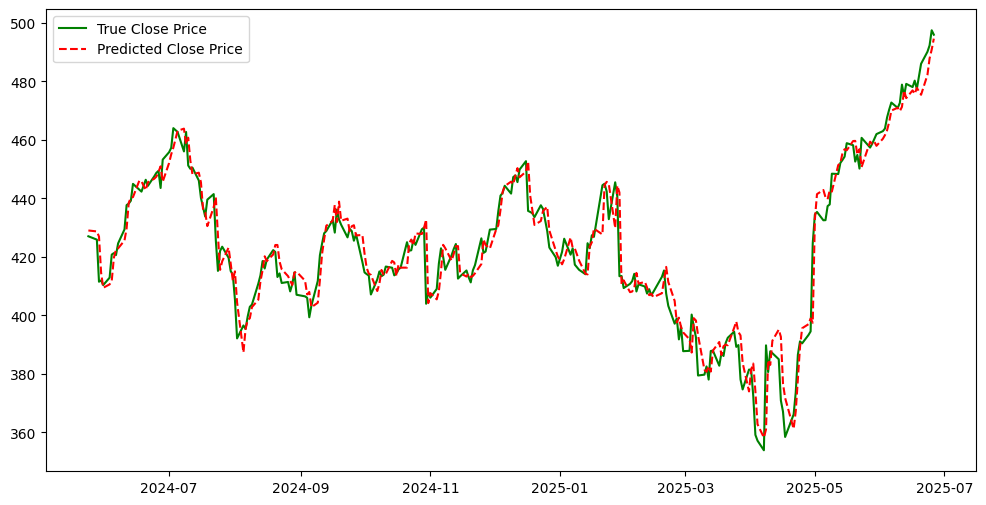

In [ ]:
# Plot the model output
dates_test = stock_df.index[-len(y_test_real):]

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test_real, label="True Close Price", color="g")
plt.plot(dates_test, y_pred_test, label="Predicted Close Price", color="r", linestyle="--")
plt.legend()
plt.show()

The plot starts from 2024-05, not from 2020-01-01 as it only shows the model's performance on the test data, which is (2024-05 -> current)

In [ ]:
# Get the MAE of the naive model to check if my model actually gives predictive value.
import numpy as np
from sklearn.metrics import mean_absolute_error

# Shift true values for comparison
naive_pred = y_test_real[:-1]
true_values = y_test_real[1:]

naive_mae = mean_absolute_error(true_values, naive_pred)
print(f"Naive model MAE: ${naive_mae:.2f}")

test_mae = mean_absolute_error(y_test_real, y_pred_test)
print(f"Test MAE: ${test_mae:.2f}")

model.eval()
with torch.inference_mode():
    y_pred_train = model(X_train_tensor)

# Convert predictions to numpy
y_pred_train_scaled = y_pred_train.detach().numpy()

# Inverse transform
y_pred_train_real = y_scaler.inverse_transform(y_pred_train_scaled)

# Also inverse y_train
y_train_real = y_scaler.inverse_transform(y_train_tensor.numpy())
train_mae = mean_absolute_error(y_train_real, y_pred_train_real)
print(f"Train MAE: ${train_mae:.2f}")

Naive model MAE: $4.41
Test MAE: $4.75
Train MAE: $10.81


Generally, the naive model performs slightly better than my model, which means even after hyperparameter tuning, the model needs improvements.

This is a problem, meaning my model adds no value to the simple naive model. Therefore, we should try a more complex approach, using LSTM / GRU.
